In [1]:
import bluepy
import netsci.visualization as nsv
import numpy as np
import scipy
import netsci.metrics.motifs as nsm
import networkx
import matplotlib.pyplot as plt
import netsci.models.random as nsr
import glob, os
from pathlib import Path
import pandas as pd
import seaborn as sns

In [2]:
circ=bluepy.Circuit('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/CircuitConfig')

In [3]:
cylinders = [i for i in circ.cells.targets if i.startswith('cylinder') ]
cylinders.remove('cylinders')
cylinders

['cylinder299049r300',
 'cylinder109262r300',
 'cylinder128660r300',
 'cylinder216679r300',
 'cylinder297714r300',
 'cylinder397485r300',
 'cylinder329179r300',
 'cylinder300',
 'cylinder269358r300',
 'cylinder253803r300']

In [5]:
data_dict = {}
cur_path = os.getcwd()
for i in os.listdir('cylinders_analysis/'):
    if i != 'mosaic':
        print(i)
        cur_conn_path = os.path.join(cur_path,'cylinders_analysis',i,'data/connectivity.npz')
        data_dict[i] = np.array(1*scipy.sparse.load_npz(cur_conn_path).todense())

cylinder253803r300
cylinder128660r300
cylinder109262r300
cylinder216679r300
cylinder269358r300
cylinder329179r300
cylinder299049r300
cylinder397485r300
cylinder300
cylinder297714r300


In [8]:
for key in data_dict.keys():
    print(key,data_dict[key].shape[0],'cells')

cylinder253803r300 6532 cells
cylinder128660r300 5461 cells
cylinder109262r300 7302 cells
cylinder216679r300 7716 cells
cylinder269358r300 6360 cells
cylinder329179r300 7934 cells
cylinder299049r300 7733 cells
cylinder397485r300 7293 cells
cylinder300 6213 cells
cylinder297714r300 6397 cells


In [9]:
len(np.where(data_dict['cylinder300'] ==1)[0])

1236142

In [ ]:
for tar in data_dict.keys():
    print(len(np.where(data_dict[tar] ==1)[0]))

In [ ]:
# takes some time
motifs_dict = {}
for key,value in data_dict.items():
    cur_motifs =  nsm.motifs(value, algorithm='louzoun',participation=True)
    motifs_dict[key] = cur_motifs
    print(key, cur_motifs[0],sep=': ')

cylinder253803r300: [       -1        -1        -1 178734851  99525261 295441654  28182635
  67881009  22492307   2605358   4356238   3720892   6337554   1865368
   1971033    254306]


In [39]:
motifs_dict

{'cylinder253803r300': array([       -1,        -1,        -1, 178734851,  99525261, 295441654,
         28182635,  67881009,  22492307,   2605358,   4356238,   3720892,
          6337554,   1865368,   1971033,    254306]),
 'cylinder128660r300': array([       -1,        -1,        -1, 142487344,  88036575, 197200061,
         21620821,  50392340,  20395426,   2101345,   3833357,   3121825,
          4658357,   1614183,   1642341,    205584]),
 'cylinder109262r300': array([       -1,        -1,        -1, 253127189, 135220160, 372205140,
         42703472,  85314472,  28438655,   3012173,   5514923,   5034203,
          8435787,   2666085,   2645271,    319716]),
 'cylinder216679r300': array([       -1,        -1,        -1, 394273166, 224272293, 489437529,
         62357294, 116354430,  46267547,   4603009,   8242205,   7399145,
         11515878,   4129137,   3882572,    463493]),
 'cylinder269358r300': array([       -1,        -1,        -1, 167341604,  91404836, 274651330,
        

In [13]:
df = pd.read_csv('cylinder_motifs.csv',index_col=0).T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cylinder253803r300,-1,-1,-1,178734851,99525261,295441654,28182635,67881009,22492307,2605358,4356238,3720892,6337554,1865368,1971033,254306
cylinder128660r300,-1,-1,-1,142487344,88036575,197200061,21620821,50392340,20395426,2101345,3833357,3121825,4658357,1614183,1642341,205584
cylinder109262r300,-1,-1,-1,253127189,135220160,372205140,42703472,85314472,28438655,3012173,5514923,5034203,8435787,2666085,2645271,319716
cylinder216679r300,-1,-1,-1,394273166,224272293,489437529,62357294,116354430,46267547,4603009,8242205,7399145,11515878,4129137,3882572,463493
cylinder269358r300,-1,-1,-1,167341604,91404836,274651330,27758150,60543269,20513856,2290958,3963979,3465058,5750610,1825413,1759504,214859
cylinder329179r300,-1,-1,-1,354487798,194955305,448651532,57011264,105494498,38869962,3758723,7203242,6525832,10514357,3515083,3455968,421153
cylinder299049r300,-1,-1,-1,288746366,161817464,493848463,51079900,107533606,33450093,3889696,6522452,6190598,10461618,3317235,3274530,424817
cylinder397485r300,-1,-1,-1,309895393,168698759,384096498,48340938,93939392,35881945,3752144,6800374,6121797,9198090,3168135,3145564,377087
cylinder300,-1,-1,-1,162025739,90327698,248200864,26151493,58563579,19939329,2211349,3976892,3382804,5457691,1721108,1735092,206611
cylinder297714r300,-1,-1,-1,168271636,92580400,291512770,27001356,70569521,23884861,2598737,4838829,3875263,6543081,1901566,2102350,261275


In [43]:
df = pd.DataFrame(motifs_dict)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cylinder253803r300,-1,-1,-1,178734851,99525261,295441654,28182635,67881009,22492307,2605358,4356238,3720892,6337554,1865368,1971033,254306
cylinder128660r300,-1,-1,-1,142487344,88036575,197200061,21620821,50392340,20395426,2101345,3833357,3121825,4658357,1614183,1642341,205584
cylinder109262r300,-1,-1,-1,253127189,135220160,372205140,42703472,85314472,28438655,3012173,5514923,5034203,8435787,2666085,2645271,319716
cylinder216679r300,-1,-1,-1,394273166,224272293,489437529,62357294,116354430,46267547,4603009,8242205,7399145,11515878,4129137,3882572,463493
cylinder269358r300,-1,-1,-1,167341604,91404836,274651330,27758150,60543269,20513856,2290958,3963979,3465058,5750610,1825413,1759504,214859
cylinder329179r300,-1,-1,-1,354487798,194955305,448651532,57011264,105494498,38869962,3758723,7203242,6525832,10514357,3515083,3455968,421153
cylinder299049r300,-1,-1,-1,288746366,161817464,493848463,51079900,107533606,33450093,3889696,6522452,6190598,10461618,3317235,3274530,424817
cylinder397485r300,-1,-1,-1,309895393,168698759,384096498,48340938,93939392,35881945,3752144,6800374,6121797,9198090,3168135,3145564,377087
cylinder300,-1,-1,-1,162025739,90327698,248200864,26151493,58563579,19939329,2211349,3976892,3382804,5457691,1721108,1735092,206611
cylinder297714r300,-1,-1,-1,168271636,92580400,291512770,27001356,70569521,23884861,2598737,4838829,3875263,6543081,1901566,2102350,261275


In [64]:
df = df.T

In [100]:
df.iloc[:,3:]

,3,4,5,6,7,8,9,10,11,12,13,14,15
cylinder253803r300,178734851,99525261,295441654,28182635,67881009,22492307,2605358,4356238,3720892,6337554,1865368,1971033,254306
cylinder128660r300,142487344,88036575,197200061,21620821,50392340,20395426,2101345,3833357,3121825,4658357,1614183,1642341,205584
cylinder109262r300,253127189,135220160,372205140,42703472,85314472,28438655,3012173,5514923,5034203,8435787,2666085,2645271,319716
cylinder216679r300,394273166,224272293,489437529,62357294,116354430,46267547,4603009,8242205,7399145,11515878,4129137,3882572,463493
cylinder269358r300,167341604,91404836,274651330,27758150,60543269,20513856,2290958,3963979,3465058,5750610,1825413,1759504,214859
cylinder329179r300,354487798,194955305,448651532,57011264,105494498,38869962,3758723,7203242,6525832,10514357,3515083,3455968,421153
cylinder299049r300,288746366,161817464,493848463,51079900,107533606,33450093,3889696,6522452,6190598,10461618,3317235,3274530,424817
cylinder397485r300,309895393,168698759,384096498,48340938,93939392,35881945,3752144,6800374,6121797,9198090,3168135,3145564,377087
cylinder300,162025739,90327698,248200864,26151493,58563579,19939329,2211349,3976892,3382804,5457691,1721108,1735092,206611
cylinder297714r300,168271636,92580400,291512770,27001356,70569521,23884861,2598737,4838829,3875263,6543081,1901566,2102350,261275


In [79]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,10.0,10.0,10.0,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.00000
mean,-1.0,-1.0,-1.0,2.419391e+08,1.346839e+08,3.495246e+08,3.922073e+07,8.165861e+07,2.901340e+07,3.082349e+06,5.525249e+06,4.883742e+06,7.887302e+06,2.572331e+06,2.561422e+06,314890.10000
std,0.0,0.0,0.0,9.071952e+07,5.008616e+07,1.039799e+08,1.479811e+07,2.327434e+07,9.187709e+06,8.617784e+05,1.575973e+06,1.564398e+06,2.445342e+06,9.056193e+05,8.254517e+05,99762.89274
min,-1.0,-1.0,-1.0,1.424873e+08,8.803658e+07,1.972001e+08,2.162082e+07,5.039234e+07,1.993933e+07,2.101345e+06,3.833357e+06,3.121825e+06,4.658357e+06,1.614183e+06,1.642341e+06,205584.00000
25%,-1.0,-1.0,-1.0,1.675741e+08,9.169873e+07,2.788667e+08,2.719055e+07,6.237770e+07,2.100847e+07,2.367903e+06,4.071728e+06,3.529016e+06,5.897346e+06,1.835402e+06,1.812386e+06,224720.75000
50%,-1.0,-1.0,-1.0,2.159310e+08,1.173727e+08,3.338234e+08,3.544305e+07,7.794200e+07,2.616176e+07,2.808766e+06,5.176876e+06,4.454733e+06,7.489434e+06,2.283826e+06,2.373810e+06,290495.50000
75%,-1.0,-1.0,-1.0,3.046081e+08,1.669784e+08,4.325128e+08,5.039516e+07,1.026057e+08,3.527398e+07,3.757078e+06,6.730894e+06,6.173398e+06,1.014574e+07,3.279960e+06,3.242288e+06,410136.50000
max,-1.0,-1.0,-1.0,3.942732e+08,2.242723e+08,4.938485e+08,6.235729e+07,1.163544e+08,4.626755e+07,4.603009e+06,8.242205e+06,7.399145e+06,1.151588e+07,4.129137e+06,3.882572e+06,463493.00000


In [124]:
df2 = df.copy()
df2 = df2.iloc[:,3:]
df2 = np.log10(df2)
df2.columns = np.arange(1,14)
df2

,1,2,3,4,5,6,7,8,9,10,11,12,13
cylinder253803r300,8.252209,7.997933,8.470472,7.449982,7.831748,7.352034,6.415867,6.639112,6.570647,6.801922,6.270765,6.294694,5.405357
cylinder128660r300,8.153776,7.944663,8.294907,7.334872,7.702365,7.309533,6.322497,6.583579,6.494409,6.668233,6.207953,6.215463,5.312989
cylinder109262r300,8.403339,8.131041,8.570782,7.630463,7.931023,7.453909,6.478880,6.741539,6.701931,6.926126,6.425874,6.422470,5.504764
cylinder216679r300,8.595797,8.350776,8.689697,7.794887,8.065783,7.665276,6.663042,6.916043,6.869182,7.061297,6.615859,6.589120,5.666043
cylinder269358r300,8.223604,7.960969,8.438782,7.443391,7.782066,7.312047,6.360017,6.598131,6.539711,6.759714,6.261361,6.245390,5.332154
cylinder329179r300,8.549601,8.289935,8.651909,7.755961,8.023230,7.589614,6.575040,6.857528,6.814636,7.021783,6.545936,6.538570,5.624440
cylinder299049r300,8.460517,8.209025,8.693594,7.708250,8.031544,7.524397,6.589916,6.814411,6.791733,7.019599,6.520776,6.515149,5.628202
cylinder397485r300,8.491215,8.227112,8.584440,7.684315,7.972848,7.554876,6.574279,6.832533,6.786879,6.963698,6.500804,6.497699,5.576442
cylinder300,8.209584,7.955821,8.394803,7.417496,7.767628,7.299711,6.344657,6.599544,6.529277,6.737009,6.235808,6.239323,5.315153
cylinder297714r300,8.226011,7.966519,8.464658,7.431386,7.848617,7.378123,6.414762,6.684740,6.588301,6.815782,6.279111,6.322705,5.417098


In [115]:
df3 = df.copy()
df3 = df3.iloc[:,3:]
df3 = np.divide(df3,1e8)
df3.columns = np.arange(1,14)
df3

,1,2,3,4,5,6,7,8,9,10,11,12,13
cylinder253803r300,1.787349,0.995253,2.954417,0.281826,0.678810,0.224923,0.026054,0.043562,0.037209,0.063376,0.018654,0.019710,0.002543
cylinder128660r300,1.424873,0.880366,1.972001,0.216208,0.503923,0.203954,0.021013,0.038334,0.031218,0.046584,0.016142,0.016423,0.002056
cylinder109262r300,2.531272,1.352202,3.722051,0.427035,0.853145,0.284387,0.030122,0.055149,0.050342,0.084358,0.026661,0.026453,0.003197
cylinder216679r300,3.942732,2.242723,4.894375,0.623573,1.163544,0.462675,0.046030,0.082422,0.073991,0.115159,0.041291,0.038826,0.004635
cylinder269358r300,1.673416,0.914048,2.746513,0.277581,0.605433,0.205139,0.022910,0.039640,0.034651,0.057506,0.018254,0.017595,0.002149
cylinder329179r300,3.544878,1.949553,4.486515,0.570113,1.054945,0.388700,0.037587,0.072032,0.065258,0.105144,0.035151,0.034560,0.004212
cylinder299049r300,2.887464,1.618175,4.938485,0.510799,1.075336,0.334501,0.038897,0.065225,0.061906,0.104616,0.033172,0.032745,0.004248
cylinder397485r300,3.098954,1.686988,3.840965,0.483409,0.939394,0.358819,0.037521,0.068004,0.061218,0.091981,0.031681,0.031456,0.003771
cylinder300,1.620257,0.903277,2.482009,0.261515,0.585636,0.199393,0.022113,0.039769,0.033828,0.054577,0.017211,0.017351,0.002066
cylinder297714r300,1.682716,0.925804,2.915128,0.270014,0.705695,0.238849,0.025987,0.048388,0.038753,0.065431,0.019016,0.021024,0.002613


[Text(-2.0, 0, '0'),
 Text(0.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '3'),
 Text(6.0, 0, '4'),
 Text(8.0, 0, '5'),
 Text(10.0, 0, '6')]

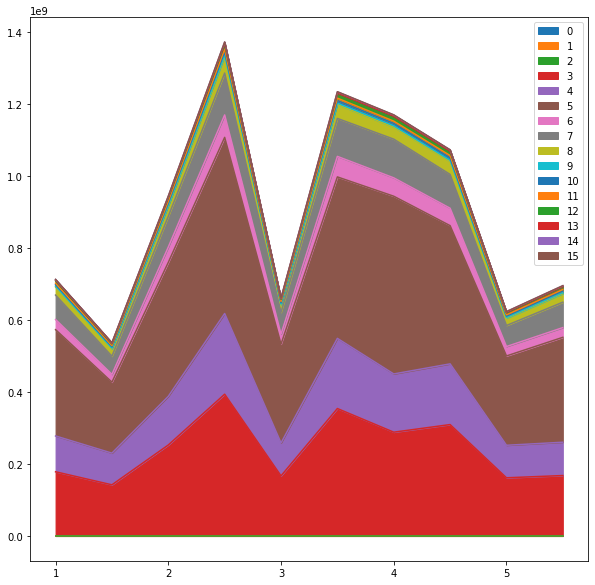

In [15]:
ax = df.plot.area(figsize=(10,10))
ax.set_xticklabels(np.arange(7))

In [17]:
df.index

Index(['cylinder253803r300', 'cylinder128660r300', 'cylinder109262r300',
       'cylinder216679r300', 'cylinder269358r300', 'cylinder329179r300',
       'cylinder299049r300', 'cylinder397485r300', 'cylinder300',
       'cylinder297714r300'],
      dtype='object')

Text(0.5, 1.0, 'Motifs distribution in cylinders (n=10)')

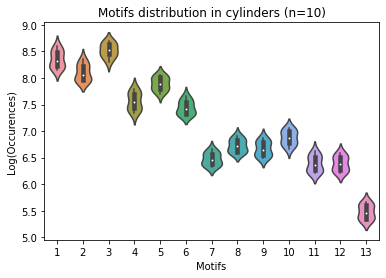

In [125]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot(data=df2, ax = axes)
plt.xlabel('Motifs')
plt.ylabel('Log(Occurences)')
plt.title('Motifs distribution in cylinders (n=10)')

Text(0.5, 1.0, 'Motifs distribution in cylinders (n=10)')

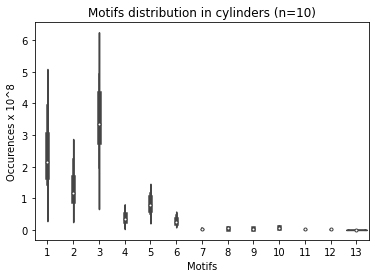

In [122]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot(data=df3, ax = axes)
plt.xlabel('Motifs')
plt.ylabel('Occurences x 10^8')
plt.title('Motifs distribution in cylinders (n=10)')

# Random Graph (average of 10 cylinders)

In [20]:
n = 6213 # num of cells in cylinder300
p = 0.015

In [63]:
sparsities = []
num_nodes = []
num_edges = []
for cylinder,value in data_dict.items():
    num_edges.append(len(np.where(data_dict[cylinder]!=0)[0]))
    num_nodes.append(data_dict[cylinder].shape[0])
    sparsities.append(len(np.where(data_dict[cylinder]!=0)[0]) / data_dict[cylinder].size) # divide nonzeros in adj matrix to its size to get its sparsity

In [72]:
n = int(np.mean(num_nodes))
p = np.mean(sparsities)
print(n,p)

6894 0.03293146288255226


In [73]:
erdos_mean = nsr.erdos_renyi(n, p)
erdos_motifs_mean = nsm.motifs(erdos_mean, algorithm='louzoun')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'Random Graph with n=6894, p=0.033'}>,
 <AxesSubplot:>]

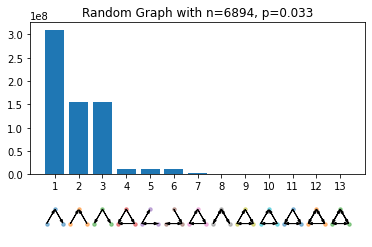

In [75]:
nsv.bar_motifs(erdos_motifs_mean,title=f'Random Graph with n={n}, p={np.round(p,3)}')

# For cylinder300

In [123]:
n = 6213 # num of cells in cylinder300
#p = 0.015 # based on PCs only
p = len(np.where(data_dict['cylinder300'] == 1)[0]) / n**2
erdos = nsr.erdos_renyi(n, p)

In [27]:
erdos_motifs = nsm.motifs(erdos, algorithm='louzoun')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'ER Graph (cylinder300) with n=6213, p=0.032'}>,
 <AxesSubplot:>]

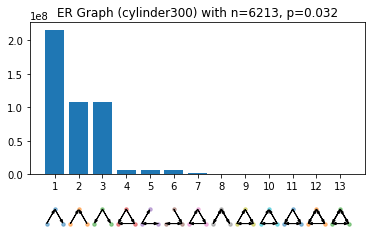

In [35]:
nsv.bar_motifs(erdos_motifs,title=f'ER Graph (cylinder300) with n={n}, p={np.round(p,3)}')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


(0.0, 400000000.0)

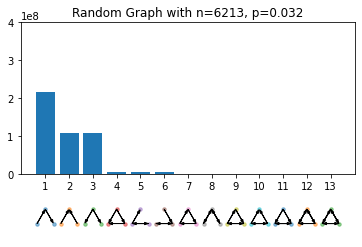

In [29]:
ax0, ax1 = nsv.bar_motifs(erdos_motifs,title=f'Random Graph with n={n}, p={np.round(p,3)}')
ax0.set_ylim([0,4e8])

# Dense ER

In [147]:
erdos_dense = nsr.erdos_renyi(n, 0.1)
erdos_motifs_dense = nsm.motifs(erdos_dense, algorithm='louzoun')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'Random Graph p=0.1'}>, <AxesSubplot:>]

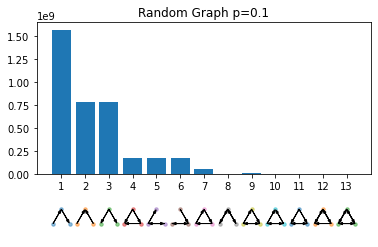

In [148]:
nsv.bar_motifs(erdos_motifs_dense,title='Random Graph p=0.1')

# Z score

In [37]:
data_dict['cylinder300'].shape[0]

6213

First, we need to calculate motifs for ER and dd networks 1000 times. then use their mean and std of motif structures to normalize our motifs

In [ ]:
num_repetitions = 1000
motifs = []
n = data_dict['cylinder300'].shape[0] # num of cells in cylinder300 = 6213
p = len(np.where(data_dict['cylinder300'] == 1)[0]) / n**2 # p = 0.032
for rep in range(num_repetitions):
    cur_erdos = nsr.erdos_renyi(n, p)
    cur_motifs = nsm.motifs(cur_erdos, algorithm='louzoun')
    motifs.append(cur_motifs)
np.save('ER_motifs',motifs)

In [30]:
df2 = pd.read_csv('motifs_exp_control.csv',index_col=0)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cylinder253803r300,-1.0,-1.0,-1.0,1.787349e+08,9.952526e+07,2.954417e+08,2.818264e+07,6.788101e+07,2.249231e+07,2.605358e+06,4.356238e+06,3.720892e+06,6.337554e+06,1.865368e+06,1.971033e+06,254306.000000
cylinder128660r300,-1.0,-1.0,-1.0,1.424873e+08,8.803658e+07,1.972001e+08,2.162082e+07,5.039234e+07,2.039543e+07,2.101345e+06,3.833357e+06,3.121825e+06,4.658357e+06,1.614183e+06,1.642341e+06,205584.000000
cylinder109262r300,-1.0,-1.0,-1.0,2.531272e+08,1.352202e+08,3.722051e+08,4.270347e+07,8.531447e+07,2.843866e+07,3.012173e+06,5.514923e+06,5.034203e+06,8.435787e+06,2.666085e+06,2.645271e+06,319716.000000
cylinder216679r300,-1.0,-1.0,-1.0,3.942732e+08,2.242723e+08,4.894375e+08,6.235729e+07,1.163544e+08,4.626755e+07,4.603009e+06,8.242205e+06,7.399145e+06,1.151588e+07,4.129137e+06,3.882572e+06,463493.000000
cylinder269358r300,-1.0,-1.0,-1.0,1.673416e+08,9.140484e+07,2.746513e+08,2.775815e+07,6.054327e+07,2.051386e+07,2.290958e+06,3.963979e+06,3.465058e+06,5.750610e+06,1.825413e+06,1.759504e+06,214859.000000
cylinder329179r300,-1.0,-1.0,-1.0,3.544878e+08,1.949553e+08,4.486515e+08,5.701126e+07,1.054945e+08,3.886996e+07,3.758723e+06,7.203242e+06,6.525832e+06,1.051436e+07,3.515083e+06,3.455968e+06,421153.000000
cylinder299049r300,-1.0,-1.0,-1.0,2.887464e+08,1.618175e+08,4.938485e+08,5.107990e+07,1.075336e+08,3.345009e+07,3.889696e+06,6.522452e+06,6.190598e+06,1.046162e+07,3.317235e+06,3.274530e+06,424817.000000
cylinder397485r300,-1.0,-1.0,-1.0,3.098954e+08,1.686988e+08,3.840965e+08,4.834094e+07,9.393939e+07,3.588194e+07,3.752144e+06,6.800374e+06,6.121797e+06,9.198090e+06,3.168135e+06,3.145564e+06,377087.000000
cylinder300,-1.0,-1.0,-1.0,1.620257e+08,9.032770e+07,2.482009e+08,2.615149e+07,5.856358e+07,1.993933e+07,2.211349e+06,3.976892e+06,3.382804e+06,5.457691e+06,1.721108e+06,1.735092e+06,206611.000000
cylinder297714r300,-1.0,-1.0,-1.0,1.682716e+08,9.258040e+07,2.915128e+08,2.700136e+07,7.056952e+07,2.388486e+07,2.598737e+06,4.838829e+06,3.875263e+06,6.543081e+06,1.901566e+06,2.102350e+06,261275.000000


In [62]:
dd_motifs = np.array([206002585, 103002838, 103030367,   8864003,  12187251,  12178900,
         2955388,    358112,    601756,    301333,    300414,     44187,
             590])

In [37]:
all_motifs_dd = np.load('10_motifs_dd.npy')
dd_mean = np.mean(all_motifs_dd,axis=0)[3:]
dd_std = np.std(all_motifs_dd,axis=0)[3:]

In [38]:
z_dd = (df2.loc['cylinder300'][3:].values - dd_mean) / dd_std

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'Z-score based on DD-graph'}>, <AxesSubplot:>]

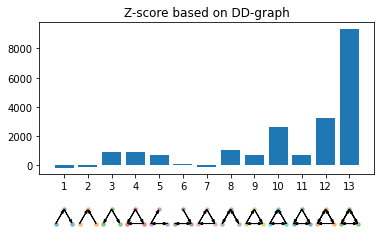

In [39]:
nsv.bar_motifs(np.hstack([-np.ones(3),z_dd]),title='Z-score based on DD-graph')

In [135]:
from matplotlib import pyplot as plt, gridspec
from netsci.metrics.motifs import *

In [136]:
from netsci.visualization.motifs import *

(-0.04000000000000015, 14.040000000000001, -0.2825125000000001, 0.4327625)

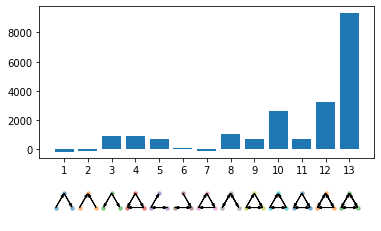

In [42]:
order = range(len(z_dd))
x = 1 + np.arange(len(order))
plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3])
ax0 = plt.subplot(gs[0])
ax0.bar(x, z_dd[order])
_=plt.xticks(x)

ax1 = plt.subplot(gs[1], sharex=ax0)
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'Triplets in Distance Dependent Graph (n=10)'}>,
 <AxesSubplot:>]

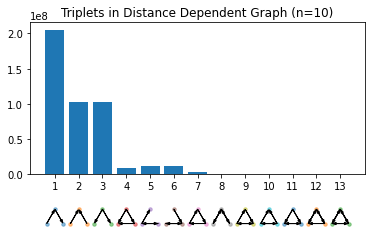

In [185]:
nsv.bar_motifs(np.hstack([-np.ones(3),dd_mean]),title='Triplets in Distance Dependent Graph (n=10)')

(0.018472508362765594, 13.981527491637234, -0.2825125000000001, 0.4327625)

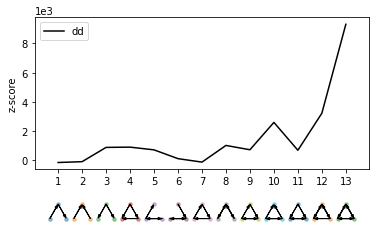

In [43]:
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3])
ax0 = plt.subplot(gs[0])
plt.plot(x,z_dd,'k')
_=plt.xticks(x)
plt.legend(['dd'],loc='best')
plt.ylabel('z-score')

# after plotting the data, format the labels
#current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


ax1 = plt.subplot(gs[1], sharex=ax0)
_=plt.xticks(np.arange(1,14))
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')



In [15]:
motifs_ER = []
for i in range(100,1100,100):
    cur_file = np.load(f'ER_motifs_{i}.npy')
    motifs_ER.extend(cur_file)
motifs_ER = np.array(motifs_ER)

In [24]:
mean_motifs_ER = np.mean(motifs_ER,axis=0)
std_motifs_ER = np.std(motifs_ER,axis=0)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'ER Graph, n=6213, p=0.032 (N=1000)'}>,
 <AxesSubplot:>]

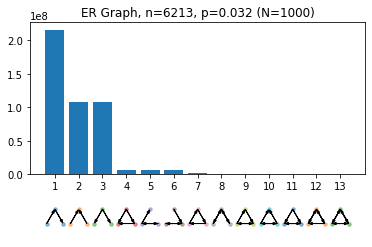

In [29]:
nsv.bar_motifs(mean_motifs_ER,title='ER Graph, n=6213, p=0.032 (N=1000)')

In [32]:
z_ER = (df2.loc['cylinder300'][3:].values - mean_motifs_ER[3:]) / std_motifs_ER[3:]

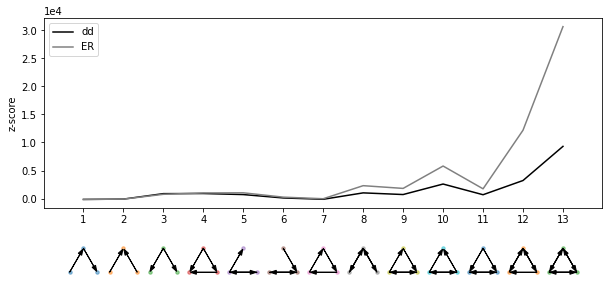

In [53]:
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3],figure=fig)
ax0 = plt.subplot(gs[0])
plt.plot(x,z_dd,'k')
plt.plot(x,z_ER,'gray')

_=plt.xticks(x)
plt.legend(['dd','ER'],loc='best')
plt.ylabel('z-score')

# after plotting the data, format the labels
#current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


ax1 = plt.subplot(gs[1], sharex=ax0)
_=plt.xticks(np.arange(1,14))
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')
plt.savefig('CA1_ER_dd_triads_zscore.png')



# Reciprocal ER

In [100]:
reciprocal_conns_list = []
for i in range(data_dict['cylinder300'].shape[0]):
    for j in range(data_dict['cylinder300'].shape[1]):
        if i != j:
            if data_dict['cylinder300'][i,j] == data_dict['cylinder300'][j,i]:
                if data_dict['cylinder300'][i,j] != 0:
                    reciprocal_conns_list.append([i,j])

In [101]:
len(reciprocal_conns_list)

129792

In [102]:
data = {tuple(sorted(item)) for item in reciprocal_conns_list}

In [103]:
len(data)

64896

In [106]:
p_reciprocal = len(reciprocal_conns_list) / data_dict['cylinder300'].shape[0]**2
p_reciprocal

0.003362367795815739

In [125]:
n = 6213 # num of cells in cylinder300
p = len(np.where(data_dict['cylinder300'] == 1)[0]) / n**2
p_reciprocal = len(reciprocal_conns_list) / data_dict['cylinder300'].shape[0]**2

ER_reciprocal = nsr.erdos_renyi_reciprocal(n, p,p_reciprocal)

In [121]:
print(n,p,p_reciprocal)

6213 0.015 0.003362367795815739


In [127]:
ER_reciprocal_motifs = nsm.motifs(ER_reciprocal, algorithm='louzoun')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'ER Reciprocal n:6213, p=0.032, r=0.003'}>,
 <AxesSubplot:>]

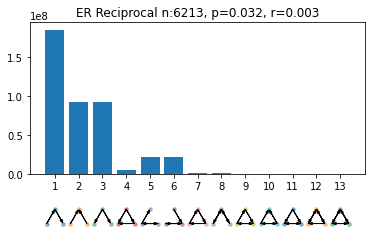

In [129]:
nsv.bar_motifs(ER_reciprocal_motifs,title=f'ER Reciprocal n:{n}, p={np.round(p,3)}, r={np.round(p_reciprocal,3)}')

In [137]:
reciprocal_ER_motifs = np.load('ER_motifs_reciprocal.npy')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'ER Graph, n=6213, p=0.032 (N=1000)'}>,
 <AxesSubplot:>]

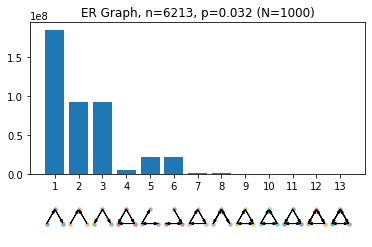

In [138]:
mean_motifs_ER_recip = np.mean(reciprocal_ER_motifs,axis=0)
std_motifs_ER_recip = np.std(reciprocal_ER_motifs,axis=0)
nsv.bar_motifs(mean_motifs_ER_recip,title='ER Graph, n=6213, p=0.032 (N=1000)')

In [139]:
z_ER_reciprocal = (df2.loc['cylinder300'][3:].values - mean_motifs_ER_recip[3:]) / std_motifs_ER_recip[3:]

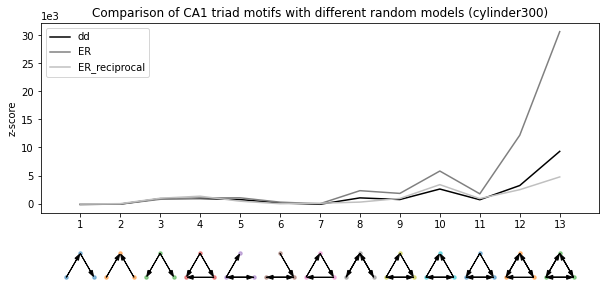

In [174]:
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3],figure=fig)
ax0 = plt.subplot(gs[0])
plt.plot(x,z_dd,'k')
plt.plot(x,z_ER,'gray')
plt.plot(x,z_ER_reciprocal,'silver')


_=plt.xticks(x)
plt.legend(['dd','ER','ER_reciprocal'],loc='best')
plt.ylabel('z-score')
plt.title('Comparison of CA1 triad motifs with different random models (cylinder300)')
# after plotting the data, format the labels
#current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))

ax1 = plt.subplot(gs[1], sharex=ax0)
_=plt.xticks(np.arange(1,14))
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')
plt.savefig('CA1_ER_dd_triads_zscore.png')



In [170]:
def normalize(z):
    return z/np.sqrt(np.sum(np.square(z)))

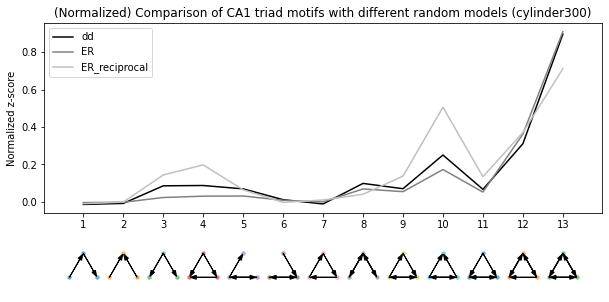

In [177]:
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3],figure=fig)
ax0 = plt.subplot(gs[0])
plt.plot(x,normalize(z_dd),'k')
plt.plot(x,normalize(z_ER),'gray')
plt.plot(x,normalize(z_ER_reciprocal),'silver')


_=plt.xticks(x)
plt.legend(['dd','ER','ER_reciprocal'],loc='best')
plt.ylabel('Normalized z-score')
plt.title('(Normalized) Comparison of CA1 triad motifs with different random models (cylinder300)')
# after plotting the data, format the labels
#current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1 = plt.subplot(gs[1], sharex=ax0)
_=plt.xticks(np.arange(1,14))
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')
plt.savefig('CA1_ER_dd_triads_zscore_norm.png')

